# Assignment 2 - groupby, parametric and non-parametric distributions

This assignment uses the 2018 Green Taxi Trip data filtered to only include trips from Sept. 24, 2018.  Download the file from Blackboard.  The original unfiltered dataset is available at [https://data.cityofnewyork.us/Transportation/2018-Green-Taxi-Trip-Data/w7fs-fd9i](https://data.cityofnewyork.us/Transportation/2018-Green-Taxi-Trip-Data/w7fs-fd9i).

Note:  To convert the `lpep_pickup_datetime` column to a `datetime` object, add the parameter `parse_dates = ["lpep_pickup_datetime"]` to `read_csv()`.  
ex. `taxi = pd.read_csv("taxi.csv", parse_dates = ["lpep_pickup_datetime"])`
Unfortunately I don't know why we have to use a different method for dates here, but the one used in the Labs does not work.

All plots should have an appropriate title and axis labels.

1. What is the mean trip distance for each possible number of passengers?  For what number of passengers is the mean trip distance the longest? 
2. What is the median trip distance for each hour (0 - 23)?  For what time of day is the median trip distance longest?  Why do you think that might be?  (There is no right or wrong answer to this last question.)
3. Plot a Seaborn relplot of the relationship between trip distance and total amount paid, with the point colored by the toll amount.  What do you notice about the relationship between trip distance and total amount paid?  Is there any relationship between the amount of tolls paid and the trip distance and/or total amount paid?
4.  For this question, only consider taxi trips of 30 miles or less.  Fit an exponential distribution to the trip distance data.  What is lambda?  Plot this exponential distribution over a histogram of the trip distance data.  Do you think the exponential distribution is a good model or estimate of the actual trip distance data?
<details> <summary>Hint:</summary>
There are several steps to this question:
- create a new data only containing taxi trips 30 miles or less
- estimate lambda using the mean trip distance
- compute x and y coordinates for the exponential distribution using the estimated lambda (or just the mean directly)
- plot the exponential distribution over the histogram of the trip distances
</details>
5.  a.  Using the full taxi dataset, take 1000 samples with replacement and compute the mean trip distance of each sample.

    b.  Plot a histogram of this sampling distrbution of sample means.  What shape does it have?  

    c.  Estimate the normal distribution that fits (best matches) the sample means, and plot the histogram again with a line showing this normal distribution.  Do you think this histogram was sampled from this normal distribution?

    d.  According to the Central Limit Theorem, the sampling distribution of the sample means should be a normal distribution with mean equal to the mean of the population and standard deviation equal to the standard deviation of the population divided by the square root of the size of the samples.  Since our data set is very large, we will assume the mean and standard deviation of the population are the same as the mean and standard deviation of the sample (our taxi data).  Redraw the histogram and normal distribution from step c, adding a line for the normal distribution predicted by the Central Limit Theorem.  How close is the normal distribution predicted by the Central Limit Theorem to the normal distribution we estimated (fit) in step c?
6. a. Compute the 95% confidence interval for the mean trip distance for trips with only 1 passenger.

    b. Compute the 95% confidence interval for the mean trip distance for trips with only 2 passengers.
    
    c.  Can we conclude that the mean trip distance is different when there is 1 passenger compared to when there are 2 passengers?  Why or why not?

# Edward Biswas

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

In [3]:
taxi = pd.read_csv("taxi.csv", parse_dates = ["lpep_pickup_datetime"])

In [53]:
taxi.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-09-24 00:00:03,09/24/2018 12:12:18 AM,N,1,83,56,2,2.38,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,1,1
1,2,2018-09-24 00:00:11,09/24/2018 12:04:28 AM,N,1,7,179,1,0.97,5.0,0.5,0.5,1.26,0.0,NaN,0.3,7.56,1,1
2,2,2018-09-24 00:00:15,09/24/2018 12:06:38 AM,N,1,260,129,1,1.21,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
3,2,2018-09-24 00:00:19,09/24/2018 12:06:18 AM,N,1,7,223,1,1.34,6.5,0.5,0.5,0.00,0.0,NaN,0.3,7.80,2,1
4,2,2018-09-24 00:00:20,09/24/2018 12:10:45 AM,N,1,66,97,5,2.14,9.5,0.5,0.5,2.16,0.0,NaN,0.3,12.96,1,1


What is the mean trip distance for each possible number of passengers?

In [100]:
taxi.groupby('passenger_count')['trip_distance'].mean()

passenger_count
0    3.168824
1    3.440191
2    3.326956
3    3.502949
4    2.319286
5    3.375298
6    3.501667
8    1.370000
9    0.220000
Name: trip_distance, dtype: float64

For what number of passengers is the mean trip distance the longest?

# 3 Passengers

What is the median trip distance for each hour (0 - 23)?

In [101]:
taxi.groupby(taxi['lpep_pickup_datetime'].dt.hour)['trip_distance'].median()

lpep_pickup_datetime
0     1.830
1     1.610
2     1.865
3     1.800
4     3.060
5     4.540
6     4.260
7     2.440
8     2.060
9     2.030
10    2.140
11    2.075
12    2.170
13    2.200
14    2.040
15    1.880
16    2.040
17    1.800
18    1.710
19    1.600
20    1.640
21    1.785
22    1.840
23    1.950
Name: trip_distance, dtype: float64

For what time of day is the median trip distance longest? Why do you think that might be? (There is no right or wrong answer to this last question.)

# Longest Hour = 5, meadian trip distance = 4.540
# Because that's when most of the people leave for their job.

Plot a Seaborn relplot of the relationship between trip distance and total amount paid, with the point colored by the toll amount. What do you notice about the relationship between trip distance and total amount paid? Is there any relationship between the amount of tolls paid and the trip distance and/or total amount paid?

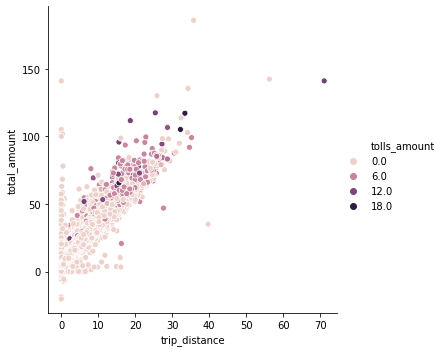

In [27]:
sns.relplot(data=taxi, x='trip_distance', y='total_amount', hue='tolls_amount')

For this question, only consider taxi trips of 30 miles or less. Fit an exponential distribution to the trip distance data. What is lambda? Plot this exponential distribution over a histogram of the trip distance data.

In [107]:
taxi_trips_filter = taxi['trip_distance'] <= 30
new_df = pd.DataFrame(taxi[taxi_trips_filter])
trip_distance = new_df['trip_distance']

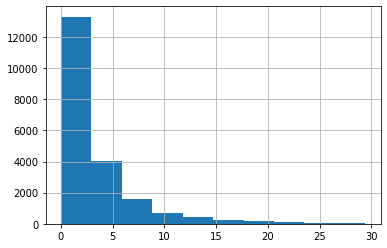

In [99]:
trip_distance.hist(bins=10)

In [118]:
x = np.linspace(0, 30, 100)
lambda_ = trip_distance.mean()
y = stats.expon.pdf(x, scale = lambda_)

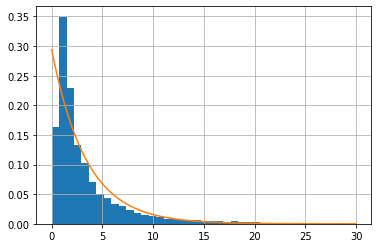

In [120]:
trip_distance.hist(bins=40, density=True)
plt.plot(x, y)

Do you think the exponential distribution is a good model or estimate of the actual trip distance data?

# Yes.

a. Using the full taxi dataset, take 1000 samples with replacement and compute the mean trip distance of each sample.

b. Plot a histogram of this sampling distrbution of sample means. What shape does it have?

c. Estimate the normal distribution that fits (best matches) the sample means, and plot the histogram again with a line showing this normal distribution. Do you think this histogram was sampled from this normal distribution?

d. According to the Central Limit Theorem, the sampling distribution of the sample means should be a normal distribution with mean equal to the mean of the population and standard deviation equal to the standard deviation of the population divided by the square root of the size of the samples. Since our data set is very large, we will assume the mean and standard deviation of the population are the same as the mean and standard deviation of the sample (our taxi data). Redraw the histogram and normal distribution from step c, adding a line for the normal distribution predicted by the Central Limit Theorem. How close is the normal distribution predicted by the Central Limit Theorem to the normal distribution we estimated (fit) in step c?

In [57]:
# create an empty list
sample_means_trip_dist = []
# loop to create 1000 samples
for i in range(1000):
    # sample once from the SCORE column with replacement
    sample = taxi['trip_distance'].sample(20687, replace=True)
    # compute the mean of the new sample
    sample_mean = sample.mean()
    # add the mean to the list
    sample_means_trip_dist.append(sample_mean)

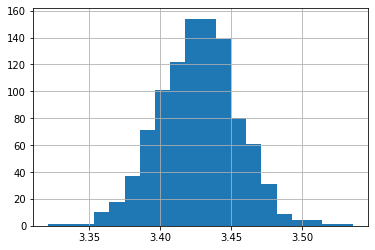

In [71]:
pd.Series(sample_means_trip_dist).hist(bins=20)

# Normal distributation 

In [121]:
mu = pd.Series(sample_means_trip_dist).mean()
sigma = pd.Series(sample_means_trip_dist).std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

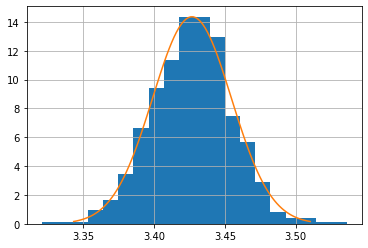

In [123]:
pd.Series(sample_means_trip_dist).hist(bins=20, density=True)
plt.plot(x, y)

a. Compute the 95% confidence interval for the mean trip distance for trips with only 1 passenger.

b. Compute the 95% confidence interval for the mean trip distance for trips with only 2 passengers.

c. Can we conclude that the mean trip distance is different when there is 1 passenger compared to when there are 2 passengers? Why or why not?

In [93]:
one_passenger_filter = taxi['passenger_count'] == 1
one_passenger_df = pd.DataFrame(taxi[one_passenger_filter])
# create an empty list
sample_one_passenger_means_trip_dist = []
# loop to create 1000 samples
for i in range(1000):
    # sample once from the SCORE column with replacement
    sample = taxi['trip_distance'].sample(17720, replace=True)
    # compute the mean of the new sample
    sample_mean = sample.mean()
    # add the mean to the list
    sample_one_passenger_means_trip_dist.append(sample_mean)

In [94]:
pd.Series(sample_one_passenger_means_trip_dist).quantile(0.025)

3.370594469525966

In [95]:
pd.Series(sample_one_passenger_means_trip_dist).quantile(0.975)

3.4932634170429164

In [96]:
two_passenger_filter = taxi['passenger_count'] == 2
two_passenger_df = pd.DataFrame(taxi[two_passenger_filter])
# create an empty list
sample_two_passenger_means_trip_dist = []
# loop to create 1000 samples
for i in range(1000):
    # sample once from the SCORE column with replacement
    sample = taxi['trip_distance'].sample(1498, replace=True)
    # compute the mean of the new sample
    sample_mean = sample.mean()
    # add the mean to the list
    sample_two_passenger_means_trip_dist.append(sample_mean)

In [97]:
pd.Series(sample_two_passenger_means_trip_dist).quantile(0.025)

3.2126748998664914

In [98]:
pd.Series(sample_two_passenger_means_trip_dist).quantile(0.975)

3.6304901535380485

# No because the mean trip for passenger one and passenger two is very identical.